## Introduction
(TODO) // keep at the end, the general description of our project

## Literature Review
Housing price prediction has had its fair share of predictive methods thrown at it in the past decade. In 2008, a paper was released comparing hedonic regression (a popular method of housing price prediction) to artificial neural networks using a dataset from turkey. The results showed improved performance in the neural network compared to hedonic regression (Selim 2008). In 2014, another study was published reviewing data from Fairfield County, Virginia in which they tested several alternative methods from ours, finding error rates around 27% using decision trees and the Ripper algorithm (Park and Bae 2014). Beyond that they note the use of SVM’s, a model which was found to outperform ANNs in a 2019 study of Hong Kong housing prices by Abidoye et al., and which had the lowest MSE in a 2014 study by Mu, Wu, and Zhang (Abidoye et al. 2019; Mu, Wu, and Zhang 2014). These results make sense, since a SVM will find the global minimum while ANNs may get stuck at local minima (Abidoye et al. 2019). 

More recently, a conference paper by Mangaleswaran and Vigneshwari carried out a test similar to ours, comparing ANNs, logistic regression, k-means clustering, and linear regression. While they only tried to predict if houses would be above or below the mean price, they still found ANNs to be the most accurate, standing at 85% with logistic regression at 80% (Mangaleswaran and Vigneshwari 2020). This was to be expected since the recommended the semi-logarithmic form is known to produce more accurate results (Selim 2009). Diving specifically into neural networks, a 2021 paper by Kalliola et al. tested hyperparameters for neural networks used in housing price prediction on a Helsinki dataset. They found 6 hidden layers to be ideal with each layer having anywhere from 150 to 950 nodes (Kalliola et al. 2021). While unable to meet this level of complexity in our network, we aim to compare neural network performance to some of the other models when it comes to housing price prediction.


#### Sources
Abidoye, Rotimi Boluwatife, et al. “Predicting Property Price Index Using Artificial Intelligence Techniques.” International Journal of Housing Markets and Analysis, vol. 12, no. 6, Emerald Publishing Limited, 2019, pp. 1072–92, https://doi.org/10.1108/IJHMA-11-2018-0095.

Kalliola, Jussiet et al. "Neural Network Hyperparameter Optimization for Prediction of Real Estate Prices in Helsinki." PeerJ Computer Science, 2021. ProQuest, https://www.proquest.com/scholarly-journals/neural-network-hyperparameter-optimization/docview/2514869195/se-2, doi:http://dx.doi.org/10.7717/peerj-cs.444.

Mangaleswaran, Shivani and Vigneshwari S. “Prediction of Housing Prices Using Machine Learning, Time Series ARIMA Model and Artificial Neural Network.” ICDSMLA 2019 : Proceedings of the 1st International Conference on Data Science, Machine Learning and Applications, vol. 601, Springer, 2020, pp. 1002–08, https://doi.org/10.1007/978-981-15-1420-3_110.

Mu, Jingyi et al. "Housing Value Forecasting Based on Machine Learning Methods", Abstract and Applied Analysis, vol. 2014, Article ID 648047, 7 pages, 2014. https://doi.org/10.1155/2014/648047.

Park, Byeonghwa, and Jae Kwon Bae. “Using Machine Learning Algorithms for Housing Price Prediction: The Case of Fairfax County, Virginia Housing Data.” Expert Systems with Applications, vol. 42, no. 6, Elsevier Ltd, 2015, pp. 2928–34, https://doi.org/10.1016/j.eswa.2014.11.040.

Selim, Hasan. “Determinants of House Prices in Turkey: Hedonic Regression Versus Artificial Neural Network.” Expert Systems with Applications, vol. 36, no. 2, Elsevier Ltd, 2009, pp. 2843–52, https://doi.org/10.1016/j.eswa.2008.01.044.

## Background
(TODO) // why we choose this dataset and what we want to get from this dataset (may be combined with Introduction)

## Over view of the data set
(TODO) // how the dataset looks like, i.e. meaning of each fields

Our dataset is from _kaggle.com URL: https://www.kaggle.com/ericpierce/austinhousingprices_ by author/provider: Eric Pierce.

This dataset consists of 2018 to 2021 house transaction records from Austin, TX area. There are total 15171 samples in the dataset. Each sample has 47 attributes such as: cities' name, zip code, address, built years, amenities info, purchase price, etc. Because some of the attributes are irrelevant or difficult to deal with, we will drop some of them such as 'homeImage', 'description', etc. to make our machine learning models less complex when predicting house price.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sb
import numpy as np


In [2]:
df = pd.read_csv('../austinHousingData.csv')
print(df.info())
df.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15171 entries, 0 to 15170
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   zpid                        15171 non-null  int64  
 1   city                        15171 non-null  object 
 2   streetAddress               15171 non-null  object 
 3   zipcode                     15171 non-null  int64  
 4   description                 15171 non-null  object 
 5   latitude                    15171 non-null  float64
 6   longitude                   15171 non-null  float64
 7   propertyTaxRate             15171 non-null  float64
 8   garageSpaces                15171 non-null  int64  
 9   hasAssociation              15171 non-null  bool   
 10  hasCooling                  15171 non-null  bool   
 11  hasGarage                   15171 non-null  bool   
 12  hasHeating                  15171 non-null  bool   
 13  hasSpa                      151

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
0,111373431,pflugerville,14424 Lake Victor Dr,78660,"14424 Lake Victor Dr, Pflugerville, TX 78660 i...",30.430632,-97.663078,1.98,2,True,...,1,1,1.266667,2.666667,1063,14,3.0,4,2,111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...


transaction years:  [2019 2020 2018 2021]


<AxesSubplot:ylabel='Sale Year'>

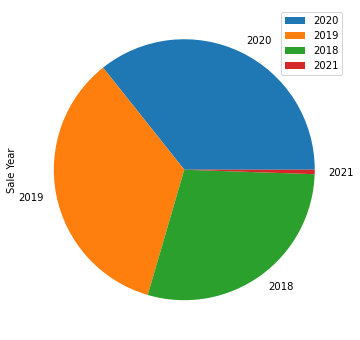

In [3]:
print("transaction years: ", df['latest_saleyear'].unique())
df['latest_saleyear'].value_counts().plot(kind='pie', legend=True, figsize=(6,6), ylabel="Sale Year")

The majority of samples are evenly from 2018 - 2020 along with few samples from 2021. // add more words

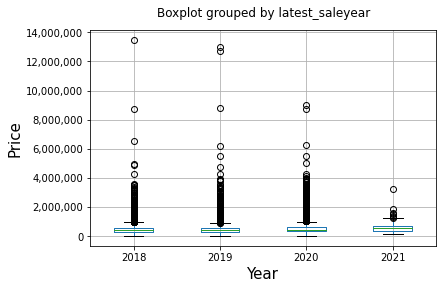

In [4]:
b = df[['latestPrice', 'latest_saleyear']].boxplot(by='latest_saleyear')
b.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
b.set_title('')
b.set_ylabel('Price',fontsize=15)
b.set_xlabel('Year', fontsize=15)
plt.show()

When we show the 'price' in boxplot, we see the range of price is significatly spread out. There are a lot points above maximum tail, which is a sign of this our dataset may not normally distributed regardless of years.

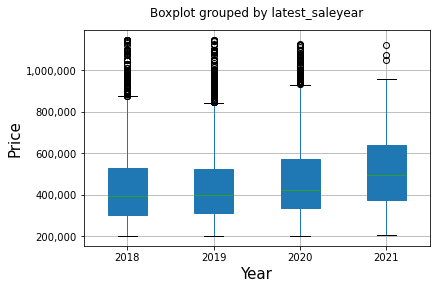

In [5]:
# get middle 90% of the dataset

q05 = df['latestPrice'].quantile(0.05)
q95 = df['latestPrice'].quantile(0.95)

a = df[df['latestPrice']>q05]
a = a[a['latestPrice']<q95]

b = a[['latestPrice', 'latest_saleyear']].boxplot(by='latest_saleyear', patch_artist=True)

#plt.ticklabel_format(style='plain', axis='y')
b.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

b.set_title("")
b.set_ylabel('Price',fontsize=15)
b.set_xlabel('Year', fontsize=15)

plt.show()


Further exploring the housing prices, we extract middle 90% of the prices and plot them, there are still a lot of outliers. However, we can see the mean price for 2018 - 2020 is around 400,000 while the mean price of 2021 is little bit higher. Due to the fact that we only have few samples from 2021, we couldn't tell whether or not inflation impacts to 2021 price.

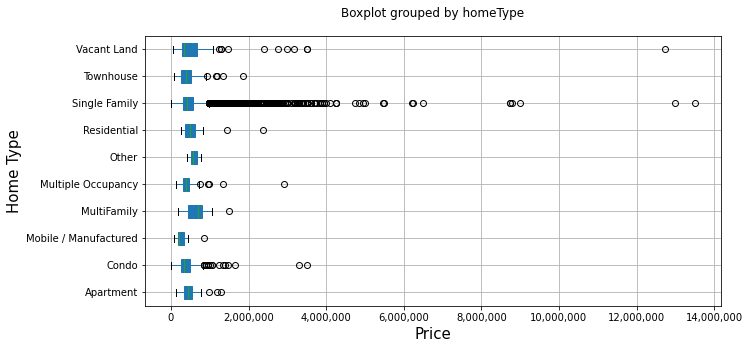

In [6]:
# boxplot with full dataset

b = df[['latestPrice', 'homeType']].boxplot(by='homeType', patch_artist=True, vert=False, figsize=(10,5))

#plt.ticklabel_format(style='plain', axis='y')
b.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

b.set_title("")
b.set_ylabel('Home Type',fontsize=15)
b.set_xlabel('Price', fontsize=15)

plt.show()

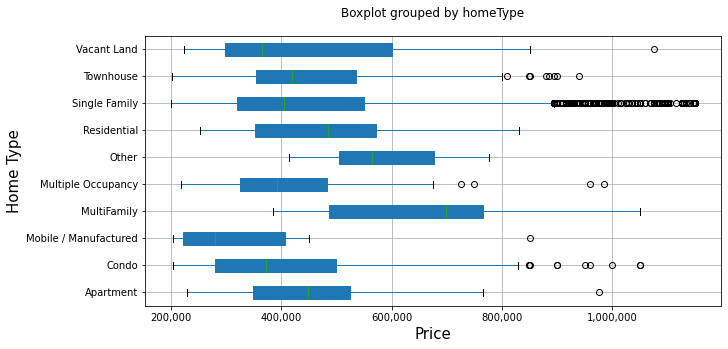

In [7]:
# boxplot with middle 90% of dataset

b = a[['latestPrice', 'homeType']].boxplot(by='homeType', patch_artist=True, vert=False, figsize=(10,5))

b.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
b.set_title("")
b.set_ylabel('Home Type',fontsize=15)
b.set_xlabel('Price', fontsize=15)

plt.show()

<AxesSubplot:xlabel='Price', ylabel='Home Type'>

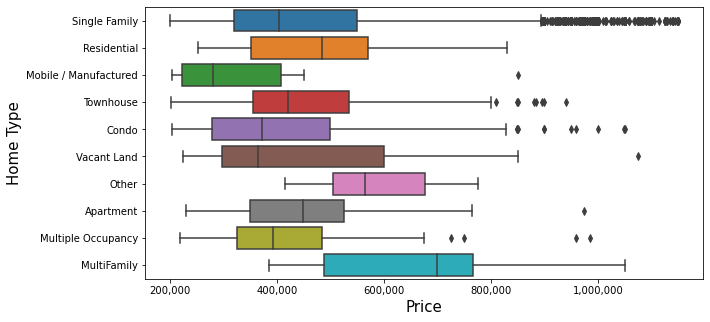

In [8]:
# same as above, decide later use which one.

plt.figure(figsize = (10,5))
b = sb.boxplot(x="latestPrice", y="homeType", data=a, orient="h")
b.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
b.set_ylabel('Home Type',fontsize=15)
b.set_xlabel('Price', fontsize=15)
b

<AxesSubplot:xlabel='Price', ylabel='Home Type'>

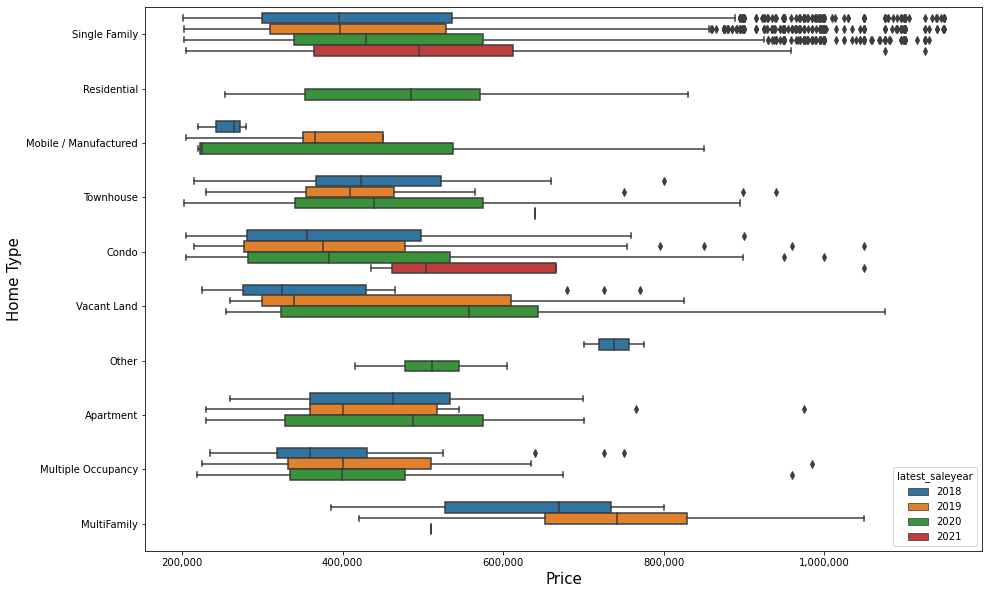

In [9]:
# boxplot with different type and different years

plt.figure(figsize = (15,10))
b = sb.boxplot(x="latestPrice", y="homeType", data=a, orient="h", hue='latest_saleyear')
b.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
b.set_ylabel('Home Type',fontsize=15)
b.set_xlabel('Price', fontsize=15)
b

Intuitively, we explore whether or not the home types can affect the housing price. // need confirm something

In [10]:
data_orig = pd.read_csv('../austinHousingData.csv')

labelsToRemove = ['zpid', 'streetAddress', 'latitude', 'longitude', 'description', 'latest_saledate', 'numOfPhotos', 'homeImage']

data_orig.drop(labelsToRemove, axis=1, inplace=True)

data_raw = data_orig.select_dtypes(exclude=['object'])
floatColumns = np.asarray(data_raw.select_dtypes(include=['float64']).columns).tolist()
boolColumns = np.asarray(data_raw.select_dtypes(include=['bool']).columns).tolist()
intColumns = np.asarray(data_raw.select_dtypes(include=['int64']).columns).tolist()

floatData = pd.merge(pd.DataFrame(data_raw.latestPrice), data_raw.drop(boolColumns + intColumns, axis=1), right_index=True, left_index=True)
boolData = pd.merge(pd.DataFrame(data_raw.latestPrice), data_raw.drop(floatColumns + intColumns, axis=1), right_index=True, left_index=True)
intData = data_raw.drop(boolColumns + floatColumns, axis=1)

#########################################
latestPrice = intData.pop('latestPrice')
intData = intData.drop(columns = 'zipcode')
intData.insert(0, 'latestPrice', latestPrice)

Heatmap for Float64 values and latestPrice


<AxesSubplot:>

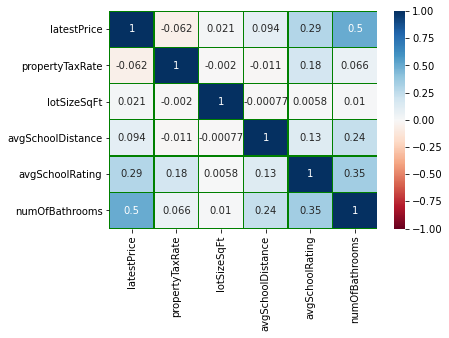

In [11]:
print("Heatmap for Float64 values and latestPrice")
sb.heatmap(floatData.corr(), vmin=-1, vmax=1, center=0, annot=True, linecolor='g', linewidths=.2, cmap="RdBu")

Here we see that __numOfBathrooms__ has the highest correlation with price of 0.5

Heatmap for bool values and latestPrice


<AxesSubplot:>

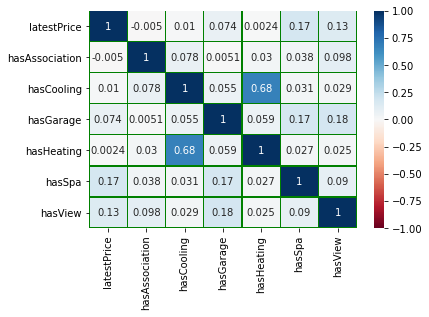

In [12]:
print("Heatmap for bool values and latestPrice")
sb.heatmap(boolData.corr(), vmin=-1, vmax=1, center=0, annot=True, linecolor='g', linewidths=.2, cmap="RdBu")

Here we see that none of these are particularly noteworthy, with __hasSpa__ having the highest correlation of 0.17

Heatmap for int values and latestPrice


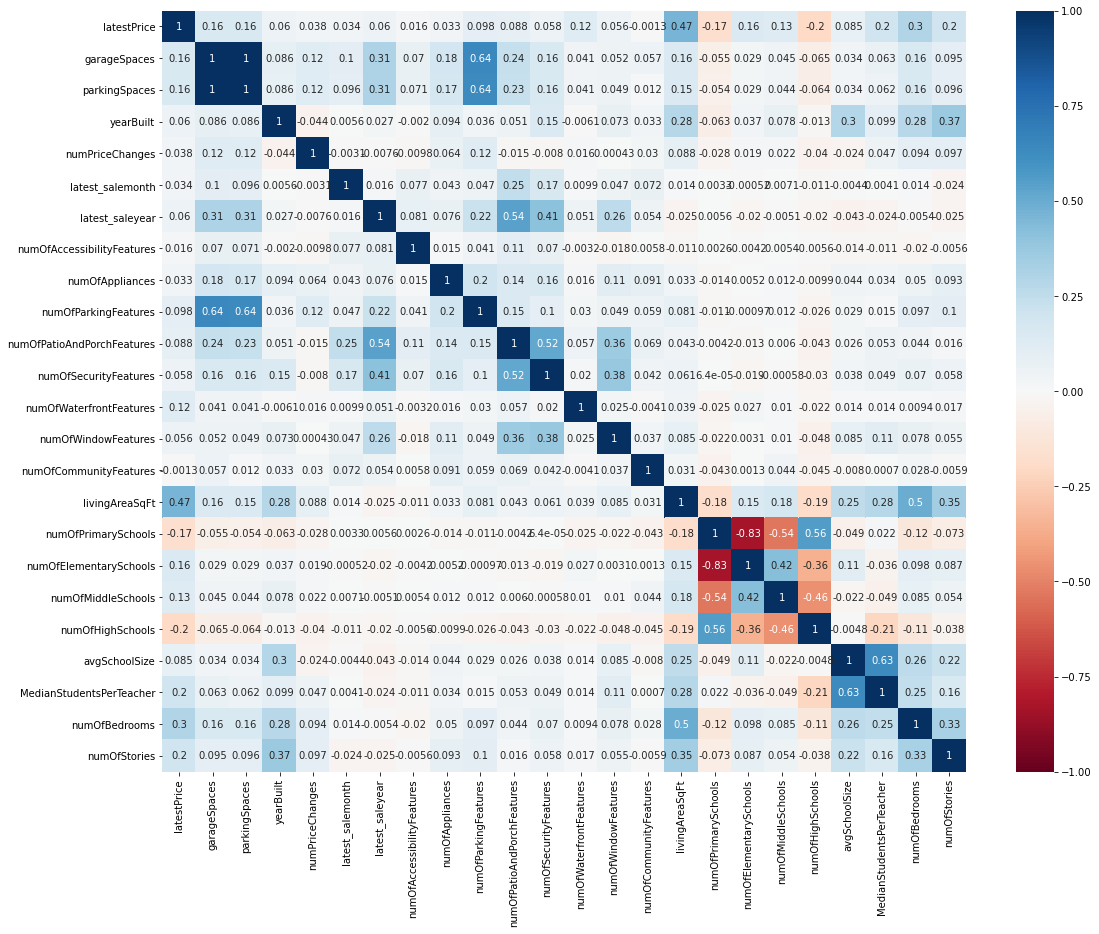

In [13]:
print("Heatmap for int values and latestPrice")
plt.figure(figsize = (18,14))
h = sb.heatmap(intData.corr(), vmin=-1, vmax=1, center=0, annot=True, cmap="RdBu")

Here we can see that __livingAreaSqFt__ has the highest correlation of 0.47. The other closest correlations are 0.3 for __numOfBedrooms__, -0.2 for __numOfHighSchools__, and 0.2 for __medianStudentPerTeacher__.  

Then, we still need to investigate two categorical attributes: __hometype__ and __zipcode__. Although __zipcode__ attribute has numerical values, it should be treated as categorical variable.

// TODO: add reason why use one-hot-coding

<AxesSubplot:>

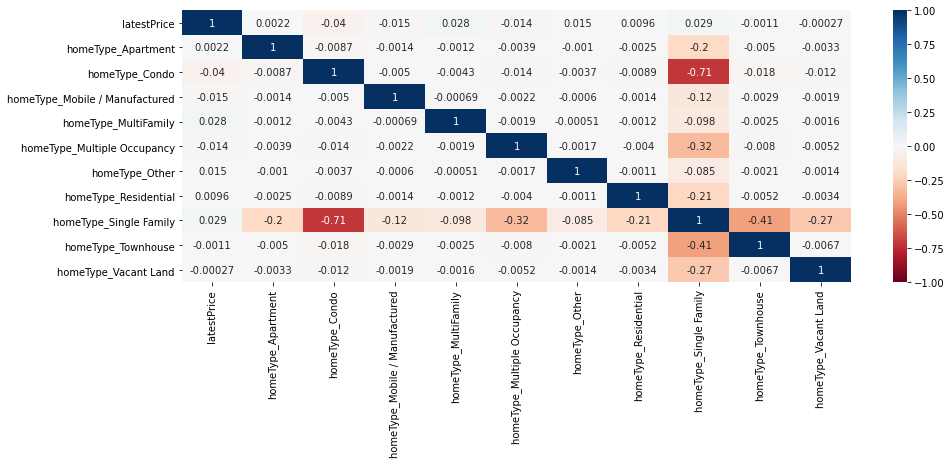

In [14]:
ht = pd.DataFrame()
ht['latestPrice'] = a['latestPrice']
ht['homeType'] = a['homeType']
ht = pd.get_dummies(ht)

plt.figure(figsize = (15,5))
sb.heatmap(ht.corr(), vmin=-1, vmax=1, center=0, annot=True, cmap="RdBu")

In [15]:
# https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9
# by Shaked Zychlinski

# no need, just test
import scipy.stats as ss
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))


cramers_v(a['homeType'], a['latestPrice'])

0.08663009562102318

In [16]:
from sklearn.preprocessing import OneHotEncoder

onehotEncoder = OneHotEncoder(sparse=False)
zipEncoded = data_orig.zipcode.values.ravel()
zipEncoded = zipEncoded.reshape(len(zipEncoded),1)
onehotZipEncoded = onehotEncoder.fit_transform(zipEncoded)
zipDataframe = pd.DataFrame(onehotZipEncoded)

zipData = pd.merge(pd.DataFrame(data_raw.latestPrice), zipDataframe, right_index=True, left_index=True)

savedIndexes = []

index = 0
for x in zipData.corr().values[0]:
    if x >= .2 and x != 1:
        print("Correlation:", x, ", index:", index)
        savedIndexes.append(index)
    index += 1

added = []

inverse = onehotEncoder.inverse_transform(onehotZipEncoded)
for i in range(0,len(onehotZipEncoded)):
    if onehotZipEncoded[i][8] == 1 or onehotZipEncoded[i][36] == 1:
        if not inverse[i] in added:
            added.append(inverse[i][0])

print(added)

Correlation: 0.21369954968195284 , index: 8
Correlation: 0.2289823565636024 , index: 36
[78747, 78704]


In [17]:
# use all data

ht = pd.DataFrame()
ht['latestPrice'] = df['latestPrice']
ht['zipcode'] = df.zipcode.astype(str)
ht = pd.get_dummies(ht)

htCorr = ht.corr()

htCorr['latestPrice'].sort_values(ascending=False)[0:5]

latestPrice      1.000000
zipcode_78746    0.228982
zipcode_78703    0.213700
zipcode_78704    0.159417
zipcode_78731    0.154315
Name: latestPrice, dtype: float64

// ? one digit zipcode different

In [18]:
# use middle 90% of data (auto eliminate outliers)

ht = pd.DataFrame()
ht['latestPrice'] = a['latestPrice']
ht['zipcode'] = a.zipcode.astype(str)
ht = pd.get_dummies(ht)

htCorr = ht.corr()

htCorr['latestPrice'].sort_values(ascending=False)[0:5]

latestPrice      1.000000
zipcode_78731    0.232804
zipcode_78704    0.211430
zipcode_78730    0.193154
zipcode_78703    0.166356
Name: latestPrice, dtype: float64

<AxesSubplot:title={'center':'Top 5 high correlation zipcodes'}, ylabel='Correlation'>

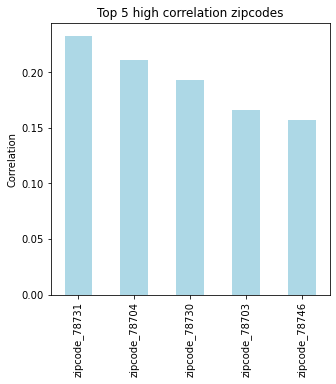

In [19]:
# correlation of zipcode and price

top5Corr = htCorr['latestPrice'].sort_values(ascending=False)[1:6]
top5Corr.plot(kind='bar', color='lightblue', figsize=(5,5), title='Top 5 high correlation zipcodes', ylabel='Correlation')

## Methodology and Data Pre-processing

Then, we started training our machine learning models. Since our goal is to predict the housing price, we use Simple Linear Regression, Multiple Linear Regression, Polynomial regression, and Artificial Neural Network(ANN) for this numerical response variables. For regression methods, the output should be directly numerical values. However, for ANN models, we divide price to several range of intervals to make them as classification problems with meaningful predictions.

In regression training processes, both linear and polynomial, we use the unscaled data to trianing the models since hether or not scaling data does not affect the accuracy of regression training. We tend to keep the data unscaled because the predicted outputs and Mean Squared Error (MSE) can directly explain how far away the predicted price from actual price. 


In ANN training processes, scaled data is required because each neuron receives inputs from all attributes. We use _MinMaxScaler_ to normalize our data to value between [0,1]. Also, since response variable _latestPrice_ is numerical continuous variable, this implies that we could have at most N number of different price as N is the number of samples in the dataset. This will makes ANN hard to make useful prediction on such huge amount of numerical price. Therefor, we divide the price into several range of intervals such [100,000 - 149,999], [150,000 - 199,999], etc. With limited numbers of price range as output, the ANN models can predict with certain values of input attributes which price range the predicted output should fall into.


* Simple Linear Regression: using the highest correlation attribute __livingAreaSqFt__ as explanatory variable (input) and __latestPrice__ as response variable (output).

* Multiple Linear Regression: using all attributes from previous section __livingAreaSqFt__, __numOfBathrooms__, __avgSchoolRating__, __numOfBedrooms__, __numOfHighSchools__, __MedianStudentsPerTeacher__ as inputs, and __latestPrice__ as output.

* Artificial Neural Network: using the same attributes as multiple linear regression.

#### Data after filtering unnecessary attributes, for Linear Regressions and Polynomial Regressions:

In [20]:
import pandas as pd
import seaborn as sb

df = pd.read_csv('../austinHousingData.csv')
df_filtered = df[['livingAreaSqFt','numOfBathrooms', 'avgSchoolRating', 'numOfBedrooms', 'numOfHighSchools', 'MedianStudentsPerTeacher', 'latestPrice']]
df_filtered.head(5)

,livingAreaSqFt,numOfBathrooms,avgSchoolRating,numOfBedrooms,numOfHighSchools,MedianStudentsPerTeacher,latestPrice
0,2601,3.0,2.666667,4,1,14,305000
1,1768,2.0,2.666667,4,1,14,295000
2,1478,2.0,3.000000,3,1,14,256125
3,1678,2.0,2.666667,3,1,14,240000
4,2132,3.0,4.000000,3,1,14,239900


#### Data after filtering unnecessary attributes and normalizing, for Artificial Neural Network (ANN):

In [21]:
# //TODO, wait for buckets of "latestPrice"

from sklearn.preprocessing import MinMaxScaler

df_X_attributes = df_filtered.drop(columns="latestPrice")
X_columns = df_X_attributes.columns
df_filtered_MM = pd.DataFrame(MinMaxScaler().fit_transform(df_X_attributes), columns = [X_columns])
df_filtered_MM.head(5)

,livingAreaSqFt,numOfBathrooms,avgSchoolRating,numOfBedrooms,numOfHighSchools,MedianStudentsPerTeacher
0,0.021112,0.111111,0.046512,0.20,0.5,0.444444
1,0.013469,0.074074,0.046512,0.20,0.5,0.444444
2,0.010808,0.074074,0.093023,0.15,0.5,0.444444
3,0.012643,0.074074,0.046512,0.15,0.5,0.444444
4,0.016809,0.111111,0.232558,0.15,0.5,0.444444


In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd

# function for showing plot of simple linear regression.
def plotSimpleLinearRegression (X, Y, plotTrain=False):

    trainX, testX, trainY, testY = train_test_split(X, Y, train_size = 0.8, random_state = 1)
    slreg = LinearRegression()
    slregModel = slreg.fit(trainX, trainY)

    print("y-intercept = %.4f" % slregModel.intercept_, "\nbeta1 coefficient = %.4f"%slregModel.coef_)
    prediction = slregModel.predict(testX)
    MSE = mean_squared_error(testY, prediction)
    print("Mean Square Error (MSE) = %.4f"%MSE)
    print("Root Mean Square Error (RMSE) = %.4f"%mean_squared_error(testY, prediction, squared=False))
    print("R-square score is: %.4f" %r2_score(testY, prediction))

    if plotTrain:
        train_pred = slregModel.predict(trainX)
        train_df = pd.DataFrame(trainX['livingAreaSqFt'], columns=['livingAreaSqFt'])
        train_df['latestPrice'] = train_pred
        train_sorted = train_df.sort_values(by=['latestPrice'])
        plt.scatter(X,Y)
        plt.title("Training Set")
        plt.xlabel("livingAreaSqFt")
        plt.ylabel("latestPrice")
        plt.plot(pd.DataFrame(train_sorted.livingAreaSqFt), pd.DataFrame(train_sorted.latestPrice), color='r')
        plt.show()

    test_pred = slregModel.predict(testX)
    test_df = pd.DataFrame(testX['livingAreaSqFt'], columns=['livingAreaSqFt'])
    test_df['latestPrice'] = test_pred
    test_sorted = test_df.sort_values(by=['latestPrice'])
    plt.scatter(X,Y)
    plt.title("Testing Set")
    plt.xlabel("livingAreaSqFt")
    plt.ylabel("latestPrice")
    plt.plot(pd.DataFrame(test_sorted.livingAreaSqFt), pd.DataFrame(test_sorted.latestPrice), color='r')
    plt.show()

# function for general linear regression output result.
def LinearRegressionModel (X, Y, showTraining=False):

    trainX, testX, trainY, testY = train_test_split(X, Y, train_size = 0.8, random_state = 1)
    lreg = LinearRegression()
    lreg = lreg.fit(trainX, trainY)

    if showTraining:
        print("y-intercept = %.4f" % lreg.intercept_)
        print("coefficient =", lreg.coef_)
        prediction = lreg.predict(trainX)
        MSE = mean_squared_error(trainY, prediction)
        print("##### Training set result #####")
        print("Mean Square Error (MSE) = %.4f"%MSE)
        print("Root Mean Square Error (RMSE) = %.4f"%mean_squared_error(trainY, prediction, squared=False))
        print("R-square score is: %.4f" %lreg.score(trainX, trainY))
        print("\n")

    print("##### Testing set result #####")
    print("y-intercept = %.4f" % lreg.intercept_)
    print("coefficient =", lreg.coef_)
    prediction = lreg.predict(testX)
    MSE = mean_squared_error(testY, prediction)
    print("Mean Square Error (MSE) = %.4f"%MSE)
    print("Root Mean Square Error (RMSE) = %.4f"%mean_squared_error(testY, prediction, squared=False))
    print("R-square score is: %.4f" %r2_score(testY, prediction))

### Simple Linear regression
With the highest correlation between _latestPrice_, we choose _livingAreaSqFt_ as the input to train our simple linear regression model. We will see how the model accurately predict the house price with single attributes that has 0.47 correlation.

First, we see how the _latestPrice_ vs _livingAreaSqFt_ scatter plot look like: 

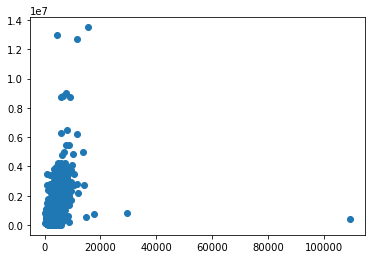

In [23]:
import matplotlib.pyplot as plt

plt.scatter(df_filtered.livingAreaSqFt, df_filtered.latestPrice)
plt.show()

After investigate those extreme points lies on the corners, we found out that they are some incorrect sample with wrong attribute values such as: 2137 sqft with 27 bathrooms, extreme large 109292	sqft with extrem low price 385000, etc. We assume typos are occured when recording data. So, we want to remove those outliers because they will affect the accuracy of the model. dro

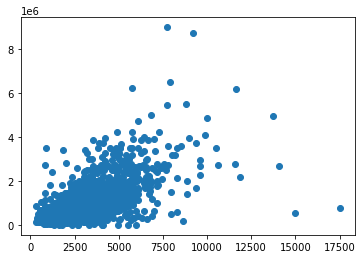

In [24]:
#dropRows = [705,1399,14275,2316,2838] # outliers rows
dropRows = [705,1399,14275,2316, 2838, 14639, 14376, 14654, 2557]

df_dropOutliers = df_filtered.drop(dropRows, axis=0)

plt.scatter(df_dropOutliers.livingAreaSqFt, df_dropOutliers.latestPrice)
plt.show()

y-intercept = -32469.8432 
beta1 coefficient = 246.8537
Mean Square Error (MSE) = 98540975616.2637
Root Mean Square Error (RMSE) = 313912.3693
R-square score is: 0.4012


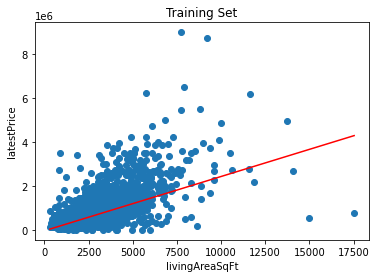

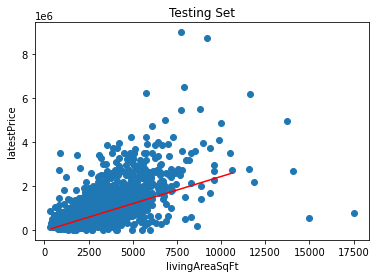

In [25]:
X = pd.DataFrame(df_dropOutliers["livingAreaSqFt"])
Y = df_dropOutliers["latestPrice"]

plotSimpleLinearRegression(X,Y, True)

### Linear regression
First, we use linear regression to estimate the house price(response variable) using the selected attributes(explanatory variables) from this dataset. We assume the relationship between the explanatory variables and response variable are linear. We skip the process of simple linear regression and start with multivarible linear regression.

In [26]:
import pandas as pd
import seaborn as sb
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

from statsmodels.regression.linear_model import OLS

df = pd.read_csv('../austinHousingData.csv')

df_filtered = df[['livingAreaSqFt','numOfBathrooms', 'avgSchoolRating', 'numOfBedrooms', 'numOfHighSchools', 'MedianStudentsPerTeacher', 'latestPrice']]

df_filtered

X = df_filtered.drop("latestPrice", axis=1)
Y = df_filtered["latestPrice"]

lreg = LinearRegression()



model = OLS(Y, X)
result = model.fit()
#result.params

lreg.fit(X, Y)

print("y-intercept = %.4f"%lreg.intercept_)
print("beta1 coefficient = ", lreg.coef_)
prediction = lreg.predict(X)
MSE = mean_squared_error(Y, prediction)
print("Mean Square Error (MSE) = %.4f"%MSE)
print("Root Mean Square Error (RMSE) = %.4f"%mean_squared_error(Y, prediction, squared=False))
print("R-square score is: %.4f" %r2_score(Y, prediction))


y-intercept = 228879.1774
beta1 coefficient =  [ 8.41496625e+01  1.61880715e+05  2.67270903e+04 -4.80547827e+04
 -1.26612859e+05 -1.35790540e+04]
Mean Square Error (MSE) = 139458357996.9523
Root Mean Square Error (RMSE) = 373441.2377
R-square score is: 0.3209


In [27]:
LinearRegressionModel(X, Y, showTraining=True)

y-intercept = 196794.0783
coefficient = [ 7.07238880e+01  1.57621856e+05  3.00119265e+04 -3.64916567e+04
 -1.26271204e+05 -1.27685934e+04]
##### Training set result #####
Mean Square Error (MSE) = 140684514004.1859
Root Mean Square Error (RMSE) = 375079.3436
R-square score is: 0.3021


##### Testing set result #####
y-intercept = 196794.0783
coefficient = [ 7.07238880e+01  1.57621856e+05  3.00119265e+04 -3.64916567e+04
 -1.26271204e+05 -1.27685934e+04]
Mean Square Error (MSE) = 136032453934.8070
Root Mean Square Error (RMSE) = 368825.7772
R-square score is: 0.3827


In [28]:
import matplotlib.pyplot as plt
fittedValues = result.fittedvalues
residuals = result.resid

residDF = pd.DataFrame(fittedValues, columns=['fittedValues'])
residDF['residuals'] = residuals

<AxesSubplot:xlabel='fittedValues', ylabel='residuals'>

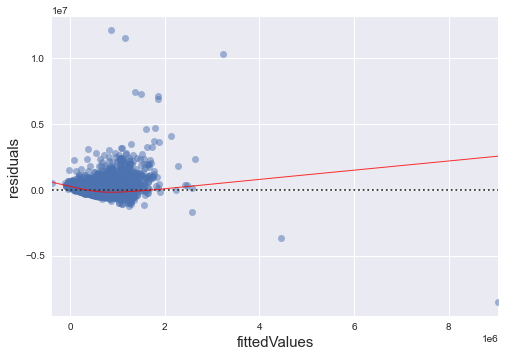

In [29]:
plt.style.use('seaborn')
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)
resid_plot = plt.figure()
resid_plot = sb.residplot(x = "fittedValues", y = "residuals", data=residDF,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

resid_plot

At the first glance, we see there are several outliers scatters around the edge of the graph. We check those samples and assume there might be mistakes on it, such as a house with 2137 squared feet has 27 bathrooms. Also, the residual graph shows our dataset is not normal and not equal variance.

<AxesSubplot:xlabel='fittedValues', ylabel='residuals'>

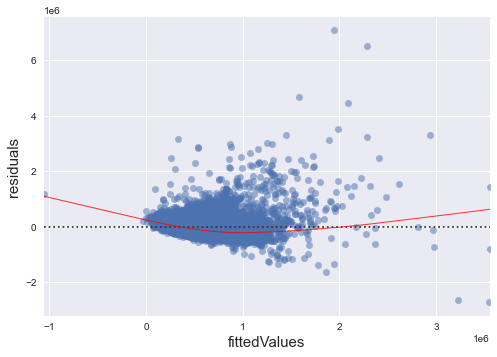

In [30]:
#dropRows = [705,1399,14275,2316,2838] # outliers rows
dropRows = [705,1399,14275,2316, 2838, 14639, 14376, 14654, 2557]
Xnew = X.drop(dropRows, axis=0)
Ynew = Y.drop(dropRows, axis=0)

#model = lreg.fit(Xnew, Ynew)
model = OLS(Ynew, Xnew)
result = model.fit()
result.params

fittedValues = result.fittedvalues
residuals = result.resid
residDF = pd.DataFrame(fittedValues, columns=['fittedValues'])
residDF['residuals'] = residuals
residDF

resid_plot = sb.residplot(x = "fittedValues", y = "residuals", data=residDF,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

resid_plot

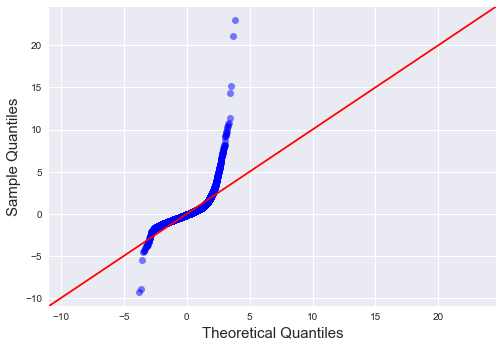

In [31]:
from statsmodels.graphics.gofplots import ProbPlot

norm_residuals = result.get_influence().resid_studentized_internal
QQ = ProbPlot(norm_residuals)
plotQQ = QQ.qqplot(line='45', alpha=0.5, color='blue', lw=1)

After remove several outliers, our dataset is still not normal and equal variance in full factor regression model. So, We try to transform the dataset.

In [32]:
# keep log10
import numpy as np

# dropRows = [705,1399,14275,2316,2838] # outliers rows
dropRows = [705,1399,14275,2316, 2838, 14639, 14376, 14654, 2557]
Xnew = X.drop(dropRows, axis=0)
tempY = Y.drop(dropRows, axis=0)
Ynew = np.log10(tempY)

<AxesSubplot:xlabel='fittedValues', ylabel='residuals'>

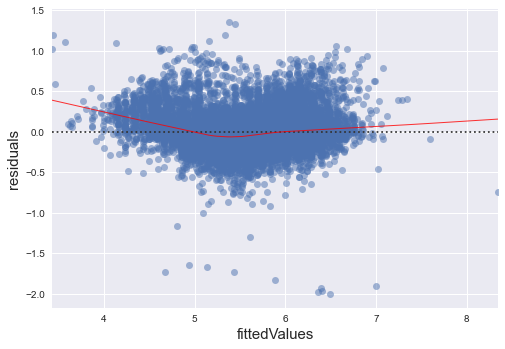

In [33]:
# residual plot for transform data.
model = OLS(Ynew, Xnew)
result = model.fit()
fittedValues = result.fittedvalues
residuals = result.resid
residDF = pd.DataFrame(fittedValues, columns=['fittedValues'])
residDF['residuals'] = residuals

resid_plot = sb.residplot(x = "fittedValues", y = "residuals", data=residDF,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

resid_plot

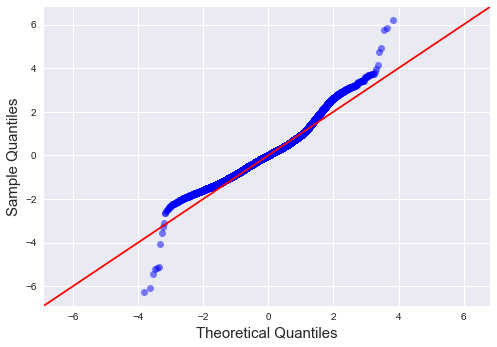

In [34]:
from statsmodels.graphics.gofplots import ProbPlot

norm_residuals = result.get_influence().resid_studentized_internal
QQ = ProbPlot(norm_residuals)
plotQQ = QQ.qqplot(line='45', alpha=0.5, color='blue', lw=1)

With ***log10(Y)*** transformation, the dataset looks better and is suitable to do linear regression. We start verifying how good our model.

$log_{10}(\hat{Y}) = \beta_0 + \beta_1X_1 + \beta_2X_2 + \beta_3X_3 + \beta_4X_4 + \beta_5X_5 + \beta_6X_6$

where:

$X_1=\text{livingAreaSqFt}, X_2=\text{numOfBathrooms}, X_3=\text{avgSchoolRating}, X_4=\text{numOfBedrooms}, X_5=\text{numOfHighSchools}, X_6=\text{MedianStudentsPerTeacher}, X_7=\text{latestPrice}$

We split our dataset to two portions, one for training and another for testing. This can mimic the situation to see how good is our model when fitting new/unseen data.

In [35]:
LinearRegressionModel(Xnew, Ynew)

##### Testing set result #####
y-intercept = 5.3817
coefficient = [ 0.00010538  0.03512534  0.02455272 -0.03085891 -0.07285844 -0.00258038]
Mean Square Error (MSE) = 0.0314
Root Mean Square Error (RMSE) = 0.1771
R-square score is: 0.4345


From the result, we obtain the coefficients of our model are:

$log_{10}(\hat{Y})=5.38 + 0.0001X_1 + 0.035X_2 + 0.0246X_3 - 0.031X_4 - 0.073X_5 - 0.0026X_6$

Although the R-Squared score is still low, we can see there is slightly improvement on transformed data. We need to keep in mind that, those coefficients and model score is for prediction of $log_{10}(Y)$. We need to use $10^{prediction}$ to convert our prediction back to normal scale of house price.

### Polynomial Regression

With outliers:

In [37]:
import numpy as np
import operator
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def min_max_normalization(x) :
    x_min = min(x)
    x_max = max(x)
    x = [(a - x_min)/(x_max - x_min) for a in x]
    return x

#Independent variables: numOfBathrooms, avgSchoolRating, numOfBedrooms, numOfHighSchools, and livingAreaSqFt
#Dependent varaibles: lateestPrice


df = pd.read_csv('../austinHousingData.csv')
df_filtered = df[['numOfBathrooms', 'avgSchoolRating', 'numOfBedrooms', 'numOfHighSchools', 'livingAreaSqFt', 'latestPrice', 'MedianStudentsPerTeacher']]
'''z = np.abs(stats.zscore(df_filtered))
threshold = 3
df_filtered_o = df_filtered[(z < threshold).all(axis=1)]
df_p = df_filtered_o.sample(len(df_filtered_o), random_state=25)'''
X_col = ['numOfBathrooms', 'avgSchoolRating', 'numOfBedrooms', 'numOfHighSchools', 'livingAreaSqFt', 'MedianStudentsPerTeacher']
X = df_filtered[X_col]


sc_X = MinMaxScaler()
X = sc_X.fit_transform(X)

Y = df_filtered.latestPrice

Y = min_max_normalization(Y)

for degree in range(2, 9):
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)

    tSize = int(len(df_filtered)*0.1)
    #X_poly_train, X_poly_test, Y_train, Y_test = train_test_split(X_poly, Y, train_size = 0.9, random_state = 1)#X_poly[:-tSize], X_poly[-tSize:], Y[:-tSize], Y[-tSize:]
    X_poly_train, X_poly_test, Y_train, Y_test = X_poly[:-tSize], X_poly[-tSize:], Y[:-tSize], Y[-tSize:]

    model = LinearRegression()
    model.fit(X_poly_train, Y_train)

    Y_train_pred = model.predict(X_poly_train)
    Y_test_pred = model.predict(X_poly_test)

    mse_train = mean_squared_error(Y_train,Y_train_pred)
    mse_test = mean_squared_error(Y_test,Y_test_pred)
    print("Degree =", degree)
    print("Training MSE for degree", degree, "=", mse_train)
    print("Testing MSE for degree", degree, "=", mse_test)

Degree = 2
Training MSE for degree 2 = 0.00038710912741126715
Testing MSE for degree 2 = 0.0022201753875286906
Degree = 3
Training MSE for degree 3 = 0.00032094422643738136
Testing MSE for degree 3 = 0.002171320176475941
Degree = 4
Training MSE for degree 4 = 0.00026626303871124177
Testing MSE for degree 4 = 0.002670810619239147
Degree = 5
Training MSE for degree 5 = 0.00022939353638875168
Testing MSE for degree 5 = 0.014071413269142572
Degree = 6
Training MSE for degree 6 = 0.00020325148145240623
Testing MSE for degree 6 = 0.7436948644603512
Degree = 7
Training MSE for degree 7 = 0.00017568717414040774
Testing MSE for degree 7 = 15692.160392664668
Degree = 8
Training MSE for degree 8 = 0.0001499960905828827
Testing MSE for degree 8 = 3171830.4418656584


Without outliers:

In [38]:
import numpy as np
import operator
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def min_max_normalization(x) :
    x_min = min(x)
    x_max = max(x)
    x = [(a - x_min)/(x_max - x_min) for a in x]
    return x

#Independent variables: numOfBathrooms, avgSchoolRating, numOfBedrooms, numOfHighSchools, and livingAreaSqFt
#Dependent varaibles: lateestPrice


df = pd.read_csv('../austinHousingData.csv')
df_filtered = df[['livingAreaSqFt', 'numOfBathrooms', 'avgSchoolRating', 'numOfBedrooms', 'numOfHighSchools', 'MedianStudentsPerTeacher', 'latestPrice']]
z = np.abs(stats.zscore(df_filtered))
threshold = 3
df_filtered_o = df_filtered[(z < threshold).all(axis=1)]
df_p = df_filtered_o.sample(len(df_filtered_o), random_state=25)
X_col = ['livingAreaSqFt', 'numOfBathrooms', 'avgSchoolRating', 'numOfBedrooms', 'numOfHighSchools', 'MedianStudentsPerTeacher']
X = df_p[X_col]


sc_X = MinMaxScaler()
X = sc_X.fit_transform(X)

Y = df_p.latestPrice.to_numpy()

Y = min_max_normalization(Y)

for degree in range(2, 9):
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)

    tSize = int(len(df_p)*0.1)
    #X_poly_train, X_poly_test, Y_train, Y_test = train_test_split(X_poly, Y, train_size = 0.9, random_state = 1)#X_poly[:-tSize], X_poly[-tSize:], Y[:-tSize], Y[-tSize:]
    X_poly_train, X_poly_test, Y_train, Y_test = X_poly[:-tSize], X_poly[-tSize:], Y[:-tSize], Y[-tSize:]

    model = LinearRegression()
    model.fit(X_poly_train, Y_train)

    Y_train_pred = model.predict(X_poly_train)
    Y_test_pred = model.predict(X_poly_test)

    mse_train = mean_squared_error(Y_train,Y_train_pred)
    mse_test = mean_squared_error(Y_test,Y_test_pred)
    print("Degree =", degree)
    print("Training MSE for degree", degree, "=", mse_train)
    print("Testing MSE for degree", degree, "=", mse_test)

Degree = 2
Training MSE for degree 2 = 0.01074463698236266
Testing MSE for degree 2 = 0.010886175044749183
Degree = 3
Training MSE for degree 3 = 0.010197520354704278
Testing MSE for degree 3 = 0.010304872457580239
Degree = 4
Training MSE for degree 4 = 0.009781156024117168
Testing MSE for degree 4 = 0.010232086628164959
Degree = 5
Training MSE for degree 5 = 0.009121447722147883
Testing MSE for degree 5 = 0.01022478996380099
Degree = 6
Training MSE for degree 6 = 0.008724801086725001
Testing MSE for degree 6 = 0.01278593358685114
Degree = 7
Training MSE for degree 7 = 0.007842995643388926
Testing MSE for degree 7 = 0.011763077344658507
Degree = 8
Training MSE for degree 8 = 0.006905841200069877
Testing MSE for degree 8 = 3.6451957195995783


Based on the results, it seems like the optimal degree is 5. Overfitting occurs when the degree becomes greater than 5, as the testing MSE becomes much greater than the training MSE. 

The 5th-degree polynomial regression

In [39]:
import numpy as np
import operator
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def min_max_normalization(x) :
    x_min = min(x)
    x_max = max(x)
    x = [(a - x_min)/(x_max - x_min) for a in x]
    return x

#Independent variables: numOfBathrooms, avgSchoolRating, numOfBedrooms, numOfHighSchools, and livingAreaSqFt
#Dependent varaibles: lateestPrice


df = pd.read_csv('../austinHousingData.csv')
df_filtered = df[['numOfBathrooms', 'avgSchoolRating', 'numOfBedrooms', 'numOfHighSchools', 'livingAreaSqFt', 'latestPrice', 'MedianStudentsPerTeacher']]
z = np.abs(stats.zscore(df_filtered))
threshold = 3
df_filtered_o = df_filtered[(z < threshold).all(axis=1)]
df_p = df_filtered_o.sample(len(df_filtered_o), random_state=25)
X_col = ['numOfBathrooms', 'avgSchoolRating', 'numOfBedrooms', 'numOfHighSchools', 'livingAreaSqFt', 'MedianStudentsPerTeacher']
X = df_p[X_col]


sc_X = MinMaxScaler()
X = sc_X.fit_transform(X)

Y = df_p.latestPrice

Y = min_max_normalization(Y)

degree = 5
poly = PolynomialFeatures(degree)
X_poly = poly.fit_transform(X)

tSize = int(len(df_p)*0.1)
#X_poly_train, X_poly_test, Y_train, Y_test = train_test_split(X_poly, Y, train_size = 0.9, random_state = 1)#X_poly[:-tSize], X_poly[-tSize:], Y[:-tSize], Y[-tSize:]
X_poly_train, X_poly_test, Y_train, Y_test = X_poly[:-tSize], X_poly[-tSize:], Y[:-tSize], Y[-tSize:]

model = LinearRegression()
model.fit(X_poly_train, Y_train)
print("y-intercept = %.4f" % model.intercept_)
print("coefficient = ", model.coef_)
print(len(model.coef_))

y-intercept = -0.6132
coefficient =  [-3.45515455e-11 -8.24519751e-01  6.33428700e+00 -3.09782920e-01
 -4.67841821e-10  3.53208722e+00  3.68210064e+00  3.49238027e+00
 -3.40892061e-01  2.52285386e+00  9.96092098e-13 -1.41969874e+01
  4.40436785e+00 -1.66596173e+01  2.30193125e+00 -3.79352105e-12
 -1.11496348e+01 -1.93359214e+01  1.23661253e+00  1.19608767e-11
  3.51844582e+00 -2.98007259e+00  1.07174825e-11 -2.33346675e-12
 -1.26876287e-12 -5.72500214e-01 -3.61103962e+00 -1.17092799e+01
 -5.14136602e+00  8.11791286e+00 -5.31252226e+00 -7.31814609e-12
  1.47208266e+00 -1.21218493e+01  3.66912566e+00 -1.89764708e+01
  1.38156153e-12  1.75052287e+01 -2.48633037e-01  4.33841712e+00
 -5.88284976e-12  1.61000294e+01  1.87189660e+00 -1.55009339e-12
  1.55342406e-12 -1.83764115e-12  3.14217284e+01  7.69505301e+00
 -1.40446353e+01  1.94420117e+01 -5.42352104e+00 -2.10542694e-12
  1.85013107e+01  4.54483062e+01  8.95966845e+00 -7.24087457e-13
 -1.46620955e+01 -1.33079258e+00  1.76814119e-12 -8.0

In [41]:
from sklearn.metrics import r2_score
prediction = model.predict(X_poly_test)
print("R-Squared Score:", r2_score(Y_test, prediction))

R-Squared Score: 0.4643841507968888


## Artificial Neural Network



## Experimental Results

### Simple Linear Regression
The simple linear regression measures the correlation between the living area square footage and the latest price of the house. According to the linear regression model, the testing MSE was 0.0031034538994231665, while the training MSE was 0.0007533569972620845. Since the testing MSE was much higher than the training MSE, it can be concluded that the simple linear regression showed signs of overfitting. Note that all of the above assumes the outliers have not been removed. When the outliers were removed, the training and testing MSEs are 0.01683046917734069 and 0.017602933835473195, respectively. The regression model no longer shows signs of overfitting, but appeared to be much less accurate.

### Multivariate Linear Regression
The multivariate linear regression uses the living area square footage, the number of bathrooms, the average school rating, the number of bedrooms, the number of high schools, and the median number of students per teacher, as the dependent variables. Just like before, the dependent variable is the latest price of the house. Assuming the outliers have not been removed, the training and testing MSEs turned out to be 0.001161543841697301 and 0.0026126372082117054, which indicates that the model shows signs of overfitting. Once the outliers have been removed, the training and testing MSEs became 0.015228611447641035 and 0.016849382441537858, respectively. Just like the simple linear regression model, the multivariate linear regression model no longer shows signs of overfitting. The multivariate linear regression model seemed to be more accurate than the simple linear regression model, although it still remained relatively inaccurate. 

### Polynomial Regression
The multivariate linear regression uses the living area square footage, the number of bathrooms, the average school rating, the number of bedrooms, the number of high schools, and the median number of students per teacher, as the dependent variables. Just like before, the dependent variable is the latest price of the house. The data for the polynomial regression is shown below:

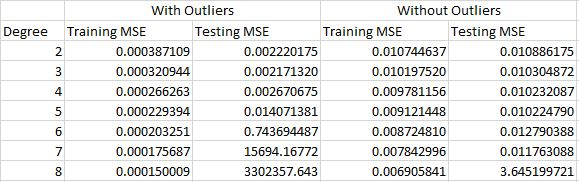

When the outliers are present, the 3rd-degree polynomial regression appeared to be the most accurate model out of all the polynomial models that were created, with a training MSE of 0.000320944 and a testing MSE of 0.002171320. After the outliers are removed, however, the best polynomial regression model turned out to be the 5th-degree polynomial model, with a training MSE of 0.009121448 and a testing MSE of 0.010224790. Furthermore, the regression model no longer shows signs of overfitting once the outliers have been removed. The 5th-degree polynomial regression model appears to be more accurate than the simple and multivariate linear regression models since it has a lower training and testing MSE than the linear regression models once the outliers have been removed.

### Artifical Neural Network 

The artifical neural network uses the living area square footage, the number of bathrooms, the average school rating, the number of bedrooms, the number of high schools, and the median number of students per teacher, as the dependent variables. Just like before, the dependent variable is the latest price of the house. The prices themselves have been divided into 22 different ranges. The ANN itself is based off Keras' sequential model and three hidden dense layers with 100, 80, and 50 nodes. It uses stochastic-gradient descent as its optimizer and categorical_crossentropy as its loss function. The output layer had 17 since there were 17 different price bucket classes. 


//two dense layers. One layer has 12 units, while the other layer has 23 units. Both layers use the relu activation function. The training MSEs for this model range from 0.04 to 0.13. The accuracy for this model was approximately 20%. It is clear that the ANN leaves much to be desired, even when compared to the linear regression models. 

### Overall Results

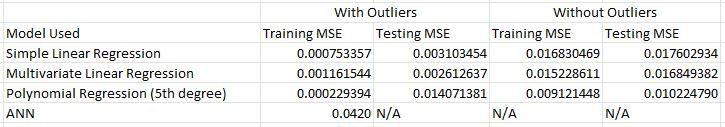

Overall, it seemed that the 5th-degree polynomial degression was the most effective model at measuring the correlation between the price of the house and the other independent variables, especially if the outliers are removed. The linear regression models proved less effective than the 5th-degree polynomial regression model, but still had acceptably low training and testing MSEs. Curiously, the artifical neural network was by far the least accurate model when it came to predicting the housing price. A trend observed in almost all the models (except the polynomial regression model) was the fact that the training and testing MSEs increased substantially once the outliers have been removed.

### Error Analysis
One possible reason why the models were not as accurate as they could be is the fact that too many samples have been removed from the dataset during preprocessing. Removing too many samples reduced the sample size, which made it more difficult to properly train models. The accuracy of these models suffered as a result. Keep in mind that removing outliers from the dataset is supposed to increase the accuracy of the models, not decrease it. The fact that removing the outliers decreased the accuracy of these models indicates that too many legitimate samples have been removed from the dataset. To remedy this, the threshold used to remove the outliers needs to be increased so that fewer legitimate samples would be removed from the dataset. Besides that, bugs and other problems that have not been discovered in the models could have affected the accuracy of the models. These bugs and issues cause the models to be trained improperly. As such, the models are less capable of accurately predicting the housing price. A egregious example of this can be found in the artifical neural network, whose training MSE was high and whose accuracy was low. More rigorous checks and debugging techniques could mitigate the effects of these bugs. The code for the ANN would need to be rewritten in order to address this issue. Least but not least, the size of the dataset could have been increased. A larger dataset can further mitigate the effects of outliers and provide a more accurate picture regarding the relationship between the housing price and the other independent variables.

## Conclusion
(TODO) // what we achieved/found from above machine learning processes. (or can have something about the APP)